# Data Wrangling: Acquisition & Preparation

In this lesson, we'll be acquiring and preparing some data from our SQL database.

## Learning Goals:

    
- Acquire a sample of data from SQL.
- Identify null values, which nulls are 'deal-breakers', i.e. rows removed, which nulls should be represented by 0, and which should be replaced by a value from other methods, such as mean.		
- Identify outliers and decide what to do with them, if anything (remove, keep as-is, replace).
- Data Structure: Aggregate as needed so that every row is an observation and each column is a variable (1 variable and not a measure). 

In [1]:
# regular imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split

In [2]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = '''
SELECT * FROM properties_2017
JOIN predictions_2017 USING (parcelid)
WHERE transactiondate < '2018'
AND propertylandusetypeid = 261;
'''
    
def get_zillow_data():
    df = pd.read_sql(sql_query, get_connection('zillow'))
    df = df.drop(columns='id')
    return df

Acquire our dataframe:

In [3]:
df = get_zillow_data()

### Acquire & Summarize

Let's create a function that gives us a quick summary of our data. What might we want to see?
- `.head()`
- `.info()`
- `.describe()`
- `.value_counts()`
- null counts (by column and by row)

In [4]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,NaN,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",None,NaN,"60,590,630,072,012.00",0.03,2017-01-01
1,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,NaN,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",None,NaN,"61,110,010,023,006.00",0.06,2017-01-01
2,14186244,NaN,NaN,NaN,2.00,3.00,None,NaN,2.00,NaN,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30",None,NaN,"60,590,218,022,012.00",0.01,2017-01-01
3,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",None,NaN,"60,373,001,001,006.00",-0.10,2017-01-01
4,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,...,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26",None,NaN,"60,374,608,001,014.00",-0.00,2017-01-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   airconditioningtypeid         13638 non-null  float64
 2   architecturalstyletypeid      70 non-null     float64
 3   basementsqft                  47 non-null     float64
 4   bathroomcnt                   52441 non-null  float64
 5   bedroomcnt                    52441 non-null  float64
 6   buildingclasstypeid           0 non-null      object 
 7   buildingqualitytypeid         33740 non-null  float64
 8   calculatedbathnbr             52304 non-null  float64
 9   decktypeid                    389 non-null    float64
 10  finishedfloor1squarefeet      4381 non-null   float64
 11  calculatedfinishedsquarefeet  52359 non-null  float64
 12  finishedsquarefeet12          52194 non-null  float64
 13  f

In [6]:
df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,"52,441.00","13,638.00",70.00,47.00,"52,441.00","52,441.00","33,740.00","52,304.00",389.00,"4,381.00",...,"14,561.00",81.00,"52,357.00","52,440.00","52,441.00","52,440.00","52,437.00","2,079.00","52,318.00","52,441.00"
mean,"12,999,115.87",2.44,7.10,678.98,2.30,3.30,6.26,2.30,66.00,"1,545.61",...,1.41,1.00,"196,533.75","529,688.16","2,016.00","333,465.48","6,453.51",14.10,"60,502,401,189,819.95",0.02
std,"3,411,444.02",3.85,2.67,711.83,1.02,0.95,1.72,1.02,0.00,674.87,...,0.54,0.00,"254,340.14","751,894.55",0.00,"570,527.80","8,755.57",2.39,"1,859,036,273,451.59",0.18
min,"10,711,855.00",1.00,2.00,38.00,0.00,0.00,1.00,1.00,66.00,184.00,...,1.00,1.00,129.00,"1,000.00","2,016.00",161.00,49.18,4.00,"60,371,011,101,000.00",-4.66
25%,"11,510,217.00",1.00,7.00,263.50,2.00,3.00,5.00,2.00,66.00,"1,151.00",...,1.00,1.00,"77,071.00","193,747.50","2,016.00","76,020.75","2,656.22",14.00,"60,374,012,032,004.25",-0.02
50%,"12,577,645.00",1.00,7.00,512.00,2.00,3.00,6.00,2.00,66.00,"1,410.00",...,1.00,1.00,"131,811.00","373,612.00","2,016.00","218,032.00","4,647.74",15.00,"60,376,203,011,013.50",0.01
75%,"14,129,530.00",1.00,7.00,809.50,3.00,4.00,8.00,3.00,66.00,"1,759.00",...,2.00,1.00,"226,334.00","619,301.25","2,016.00","408,606.75","7,377.50",15.00,"60,590,423,261,751.25",0.04
max,"167,687,839.00",13.00,21.00,"3,560.00",18.00,14.00,12.00,18.00,66.00,"6,912.00",...,6.00,1.00,"9,164,901.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30",99.00,"483,030,105,084,015.00",5.26


In [7]:
print(f'r0ws: {df.shape[0]}')
print(f'co1umns: {df.shape[1]}')

r0ws: 52441
co1umns: 60


In [8]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())

parcelid
11991059    3
11957553    2
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64
airconditioningtypeid
 1.00    11895
13.00     1568
 5.00      159
11.00       16
Name: airconditioningtypeid, dtype: int64
architecturalstyletypeid
 7.00    62
 3.00     3
 2.00     2
21.00     2
 8.00     1
Name: architecturalstyletypeid, dtype: int64
basementsqft
  900.00    2
  640.00    2
  100.00    2
  515.00    2
  273.00    2
  912.00    2
  314.00    1
  819.00    1
1,809.00    1
  604.00    1
  126.00    1
  588.00    1
  786.00    1
  669.00    1
  800.00    1
  396.00    1
  112.00    1
  645.00    1
  384.00    1
1,969.00    1
  252.00    1
  600.00    1
1,218.00    1
  280.00    1
  300.00    1
  224.00    1
  512.00    1
  380.00    1
  204.00    1
  200.00    1
   90.00    1
3,112.00    1
  405.00    1
1,252.00    1
  254.00    1
3,560.00    1
  352.00    1
  168.00

## Nulls By Column

Sure, using built in methods is easy enough. But what about getting our nulls by column and nulls by row? 

Let's look at nulls by column. Let's start by using `.isnull()`:

In [9]:
df.isnull().head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,False,True,True,True,False,False,True,True,False,True,...,False,False,False,False,False,True,True,False,False,False
1,False,True,True,True,False,False,True,True,False,True,...,False,False,False,False,False,True,True,False,False,False
2,False,True,True,True,False,False,True,True,False,True,...,False,False,False,False,False,True,True,False,False,False
3,False,True,True,True,False,False,True,False,False,True,...,False,False,False,False,False,True,True,False,False,False
4,False,False,True,True,False,False,True,False,False,True,...,False,False,False,False,False,True,True,False,False,False


In [10]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,NaN,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",None,NaN,"60,590,630,072,012.00",0.03,2017-01-01
1,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,NaN,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",None,NaN,"61,110,010,023,006.00",0.06,2017-01-01
2,14186244,NaN,NaN,NaN,2.00,3.00,None,NaN,2.00,NaN,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30",None,NaN,"60,590,218,022,012.00",0.01,2017-01-01
3,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",None,NaN,"60,373,001,001,006.00",-0.10,2017-01-01
4,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,...,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26",None,NaN,"60,374,608,001,014.00",-0.00,2017-01-01


This boolean DataFrame can be aggregated:

In [11]:
df.isnull().sum()[:10]

parcelid                        0
airconditioningtypeid       38803
architecturalstyletypeid    52371
basementsqft                52394
bathroomcnt                     0
bedroomcnt                      0
buildingclasstypeid         52441
buildingqualitytypeid       18701
calculatedbathnbr             137
decktypeid                  52052
dtype: int64

In [12]:
df.shape[0] # Number of rows

52441

In [13]:
(df.isnull().sum()/df.shape[0]*100)[:10] # Percentage of nulls in each column

parcelid                                   0.00
airconditioningtypeid                     73.99
architecturalstyletypeid                  99.87
basementsqft                              99.91
bathroomcnt                                0.00
bedroomcnt                                 0.00
buildingclasstypeid                      100.00
buildingqualitytypeid                     35.66
calculatedbathnbr                          0.26
decktypeid                                99.26
dtype: float64

In [14]:
nulls_col = pd.DataFrame({'num_rows_missing': df.isnull().sum(), 
              'percent_rows_missing': (df.isnull().sum() / df.shape[0] * 100)})

nulls_col.sort_values(by='num_rows_missing', ascending=False).head(10)

,num_rows_missing,percent_rows_missing
finishedsquarefeet15,52441,100.00
buildingclasstypeid,52441,100.00
finishedsquarefeet13,52441,100.00
storytypeid,52394,99.91
basementsqft,52394,99.91
yardbuildingsqft26,52378,99.88
architecturalstyletypeid,52371,99.87
typeconstructiontypeid,52365,99.86
fireplaceflag,52360,99.85
finishedsquarefeet6,52276,99.69


Lets put this together in a function:

In [16]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

## Nulls by Row

Okay, now how might we look at the number/percent of nulls in each row?

In [17]:
df.isnull().sum(axis=1)

0        30
1        27
2        28
3        27
4        25
         ..
52436    29
52437    28
52438    26
52439    28
52440    29
Length: 52441, dtype: int64

Looks like the first row has 30 nulls. Lets look at it:

In [18]:
df.head(1)[df.head(1).isna()]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


Notice that both `NaN` and `None` are considered as null. Anyways, lets look at our null counts by row again:

In [19]:
df.isnull().sum(axis=1)

0        30
1        27
2        28
3        27
4        25
         ..
52436    29
52437    28
52438    26
52439    28
52440    29
Length: 52441, dtype: int64

Lets turn it into a percentage:

In [20]:
df.isnull().sum(axis=1) / df.shape[1] * 100

0                      50.00
1                      45.00
2                      46.67
3                      45.00
4                      41.67
                ...         
52436                  48.33
52437                  46.67
52438                  43.33
52439                  46.67
52440                  48.33
Length: 52441, dtype: float64

In [21]:
nulls_row = pd.DataFrame({'num_cols_missing': df.isnull().sum(axis=1),
              'percent_cols_missing': df.isnull().sum(axis=1)/df.shape[1]*100})

nulls_row

,num_cols_missing,percent_cols_missing
0,30,50.00
1,27,45.00
2,28,46.67
3,27,45.00
4,25,41.67
...,...,...
52436,29,48.33
52437,28,46.67
52438,26,43.33
52439,28,46.67


Can we get our `parcelid` back onto this new DataFrame?

In [22]:
nulls_row = df.merge(nulls_row,
                        left_index=True,
                        right_index=True)[['parcelid', 'num_cols_missing', 'percent_cols_missing']]

nulls_row

,parcelid,num_cols_missing,percent_cols_missing
0,14297519,30,50.00
1,17052889,27,45.00
2,14186244,28,46.67
3,12177905,27,45.00
4,12095076,25,41.67
...,...,...,...
52436,12412492,29,48.33
52437,11000655,28,46.67
52438,17239384,26,43.33
52439,12773139,28,46.67


In [23]:
nulls_row.sort_values(by='num_cols_missing', ascending=False)

,parcelid,num_cols_missing,percent_cols_missing
28116,167687839,42,70.00
9001,167686999,42,70.00
41468,17188862,41,68.33
13429,14460039,40,66.67
48597,14341510,39,65.00
...,...,...,...
42219,17292665,20,33.33
21757,17194590,20,33.33
20841,17270021,20,33.33
10432,17097816,19,31.67


In [26]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True)[['parcelid', 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

## Let's Combine out Various Techniques into a single function:

In [25]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # .value_counts()
    # observation of nulls in the dataframe
    '''
    print('SUMMARY REPORT')
    print('=====================================================\n\n')
    print('Dataframe head: ')
    print(df.head(3))
    print('=====================================================\n\n')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================\n\n')
    print('Dataframe Description: ')
    print(df.describe())
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    print('DataFrame value counts: ')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts(), '\n')
        else:
            print(df[col].value_counts(bins=10, sort=False), '\n')
    print('=====================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    print('=====================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=====================================================')

In [27]:
summarize(df)

SUMMARY REPORT


Dataframe head: 
   parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  14297519                    NaN                       NaN           NaN   
1  17052889                    NaN                       NaN           NaN   
2  14186244                    NaN                       NaN           NaN   

           bathroomcnt           bedroomcnt buildingclasstypeid  \
0                 3.50                 4.00                None   
1                 1.00                 2.00                None   
2                 2.00                 3.00                None   

   buildingqualitytypeid    calculatedbathnbr  decktypeid  ...  \
0                    NaN                 3.50         NaN  ...   
1                    NaN                 1.00         NaN  ...   
2                    NaN                 2.00         NaN  ...   

   structuretaxvaluedollarcnt    taxvaluedollarcnt       assessmentyear  \
0                  485,713.00         1,023,

(0.9989, 0.9992]        0
(0.9992, 0.9994]        0
(0.9994, 0.9996]        0
(0.9996, 0.9998]        0
(0.9998, 1.0]       10009
(1.0, 1.0002]           0
(1.0002, 1.0004]        0
(1.0004, 1.0006]        0
(1.0006, 1.0008]        0
(1.0008, 1.001]         0
Name: pooltypeid7, dtype: int64 

0100    26782
122     13067
0101     6413
1111     3362
1        1069
1110     1025
0104      369
010G       94
0103       91
0108       57
010M       53
0109       18
1112        8
0110        6
0113        6
0141        4
0102        3
0105        3
010V        2
0111        2
0130        2
0131        1
0133        1
0115        1
010L        1
0114        1
Name: propertycountylandusecode, dtype: int64 

(260.738, 260.791]        0
(260.791, 260.843]        0
(260.843, 260.896]        0
(260.896, 260.948]        0
(260.948, 261.0]      52441
(261.0, 261.052]          0
(261.052, 261.104]        0
(261.104, 261.157]        0
(261.157, 261.209]        0
(261.209, 261.261]        0
Name: property

                              num_rows_missing  percent_rows_missing
finishedsquarefeet15                     52441                100.00
buildingclasstypeid                      52441                100.00
finishedsquarefeet13                     52441                100.00
storytypeid                              52394                 99.91
basementsqft                             52394                 99.91
yardbuildingsqft26                       52378                 99.88
architecturalstyletypeid                 52371                 99.87
typeconstructiontypeid                   52365                 99.86
fireplaceflag                            52360                 99.85
finishedsquarefeet6                      52276                 99.69
decktypeid                               52052                 99.26
pooltypeid10                             51997                 99.15
poolsizesum                              51574                 98.35
pooltypeid2                       

## Okay we summarized, now what?

In [28]:
def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

In [29]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold) #1, or ‘columns’ : Drop columns which contain missing value
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold) #0, or ‘index’ : Drop rows which contain missing values.
    return df

In [30]:
# combining everything in a cleaning function:
def data_prep(df, cols_to_remove=[], prop_required_column=0.5, prop_required_row=0.75):
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

In [31]:
df = data_prep(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52376 entries, 0 to 52440
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52376 non-null  int64  
 1   bathroomcnt                   52376 non-null  float64
 2   bedroomcnt                    52376 non-null  float64
 3   buildingqualitytypeid         33740 non-null  float64
 4   calculatedbathnbr             52304 non-null  float64
 5   calculatedfinishedsquarefeet  52359 non-null  float64
 6   finishedsquarefeet12          52194 non-null  float64
 7   fips                          52376 non-null  float64
 8   fullbathcnt                   52304 non-null  float64
 9   heatingorsystemtypeid         33935 non-null  float64
 10  latitude                      52376 non-null  float64
 11  longitude                     52376 non-null  float64
 12  lotsizesquarefeet             52016 non-null  float64
 13  p

## Handling Outliers
- Note your use case
- z-score: appropriate for normal data (normally distributed)
- Tukey IQR method: not contingent on normality

### Tukey Interquartile Range (IQR) Method:
- Calculate IQR
    - Get Q3 and Q1
    - Get difference (q3-q1)
    - Establish "fences":
        - Standard inner fence: k = 1.5
        - Standard outer fence: k = 3.0
        - Upper bound: q3 + k * IQR
        - Lower bound: q1 - k * IQR

In [33]:
def get_upper_outliers(s, k=1.5):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [34]:
def add_upper_outlier_columns(df, k=1.5):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], k)
    return df

In [35]:
df = add_upper_outlier_columns(df)

In [36]:
df.head(20)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,roomcnt_outliers_upper,unitcnt_outliers_upper,yearbuilt_outliers_upper,structuretaxvaluedollarcnt_outliers_upper,taxvaluedollarcnt_outliers_upper,assessmentyear_outliers_upper,landtaxvaluedollarcnt_outliers_upper,taxamount_outliers_upper,censustractandblock_outliers_upper,logerror_outliers_upper
0,14297519,3.50,4.00,NaN,3.50,"3,100.00","3,100.00","6,059.00",3.00,NaN,...,0.00,NaN,0.00,"36,255.38",0.00,0.00,0.00,0.00,0.00,0.00
1,17052889,1.00,2.00,NaN,1.00,"1,465.00","1,465.00","6,111.00",1.00,NaN,...,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,"194,969,941,974.00",0.00
2,14186244,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",2.00,NaN,...,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,12095076,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,12069064,1.00,2.00,5.00,1.00,738.00,738.00,"6,037.00",1.00,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,12790562,3.00,4.00,9.00,3.00,"3,039.00","3,039.00","6,037.00",3.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,11104527,3.00,4.00,8.00,3.00,"2,540.00","2,540.00","6,037.00",3.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,13944538,2.50,3.00,NaN,2.50,"1,340.00","1,340.00","6,059.00",2.00,NaN,...,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,17110996,2.50,3.00,NaN,2.50,"1,371.00","1,371.00","6,111.00",2.00,NaN,...,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,"195,009,960,131.00",0.00


In [37]:
outlier_cols = [col for col in df.columns if col.endswith('_outliers_upper')]
for col in outlier_cols:
    print(col, ': ')
    subset = df[col][df[col] > 0]
    print(f'Number of Observations Above Upper Bound: {subset.count()}', '\n')
    print(subset.describe())
    print('------', '\n')

parcelid_outliers_upper : 
Number of Observations Above Upper Bound: 18 

count                  18.00
mean          143,394,163.60
std            20,527,660.38
min            61,585,397.88
25%           144,905,558.38
50%           149,581,311.38
75%           149,581,634.62
max           149,584,059.88
Name: parcelid_outliers_upper, dtype: float64
------ 

bathroomcnt_outliers_upper : 
Number of Observations Above Upper Bound: 1579 

count               1,579.00
mean                    1.14
std                     0.97
min                     0.50
25%                     0.50
50%                     0.50
75%                     1.50
max                    13.50
Name: bathroomcnt_outliers_upper, dtype: float64
------ 

bedroomcnt_outliers_upper : 
Number of Observations Above Upper Bound: 780 

count                 780.00
mean                    0.78
std                     0.75
min                     0.50
25%                     0.50
50%                     0.50
75%                

# Our accomplishments so far
We have:
- Acquired our data
- Examinged the structure and integrity of the data
- We have observed univariate descriptive statistics
- We have examined null values (in total, by column, and by row)
- We have identified upper bound outliers
- We have created functions for these processes

What we still need to do:
- Create functions that identify lower bound outliers
- Create functions that act on our outliers (drop them, compress them, etc.)
- Create functions/processes that act on nulls beyond simple removal

Let's look at applying some of these techniques to a new data set:

In [38]:
# google sheet: https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0    
#Note: Data has been filtered/changed a bit from orginal form to demonstrate null and outlier handling.

sheet_url = 'https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)

In [39]:
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8152 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8152 non-null   int64  
 1   Hobbyist      8152 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8152 non-null   int64  
 5   Ethnicity     3087 non-null   object 
 6   Gender        7575 non-null   object 
 7   YearsCode     8132 non-null   object 
 8   YearsCodePro  8136 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 573.3+ KB


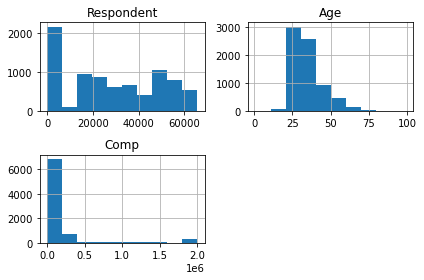

In [42]:
df.hist()
plt.tight_layout()

In [43]:
summarize(df)

SUMMARY REPORT


Dataframe head: 
   Respondent Hobbyist                  Age Age1stCode    Comp  \
0           8      Yes                36.00         12  116000   
1          14      Yes                27.00         13   66000   
2          17      Yes                25.00         14   79000   

                      Ethnicity Gender YearsCode YearsCodePro  
0  White or of European descent    Man        17           13  
1  White or of European descent    Man         5            1  
2  White or of European descent    Man         7            3  


Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8152 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8152 non-null   int64  
 1   Hobbyist      8152 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8152 non-null   int64  
 5   Ethnicity     

KeyError: "['parcelid'] not in index"

Oops! Looks like our `summarize` function uses our `nulls_by_row` function and that was designed for the zillow dataset! I suppose I'll have to tweak that to make it more universal. Let's just move on for now.

In [44]:
df = handle_missing_values(df)
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,Man,17,13
1,14,Yes,27.00,13,66000,Man,5,1
2,17,Yes,25.00,14,79000,Man,7,3
3,18,Yes,32.00,12,1260000,Man,19,12
4,19,No,24.00,15,83400,Man,9,3


In [ ]:
df.info()

We went from 8152 entries to 8146 entries. Still a lot of nulls to be managed, but at least we have eliminated the worst offenders by column and by row. 

The following columns will need to be handled:
- `Age`
- `Age1stCode`
- `Gender`
- `YearsCode`
- `YearsCodePro`

In [45]:
# Drop nulls for YearsCode, YearsCodePro, Age1stCode specifically

df = df.dropna(subset=['YearsCode', 'YearsCodePro', 'Age1stCode'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8108 non-null   int64  
 1   Hobbyist      8108 non-null   object 
 2   Age           7194 non-null   float64
 3   Age1stCode    8108 non-null   object 
 4   Comp          8108 non-null   int64  
 5   Gender        7534 non-null   object 
 6   YearsCode     8108 non-null   object 
 7   YearsCodePro  8108 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 570.1+ KB


In [47]:
# Review values in Gender
df.Gender.value_counts()

Man                                                            6630
Woman                                                           746
Non-binary, genderqueer, or gender non-conforming                96
Man;Non-binary, genderqueer, or gender non-conforming            30
Woman;Non-binary, genderqueer, or gender non-conforming          27
Woman;Man                                                         3
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

In [48]:
# Impute NaNs with mode

df.Gender.mode()[0]

'Man'

In [49]:
df['Gender'] = df.Gender.fillna(df.Gender.mode()[0])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8108 non-null   int64  
 1   Hobbyist      8108 non-null   object 
 2   Age           7194 non-null   float64
 3   Age1stCode    8108 non-null   object 
 4   Comp          8108 non-null   int64  
 5   Gender        8108 non-null   object 
 6   YearsCode     8108 non-null   object 
 7   YearsCodePro  8108 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 570.1+ KB


So far so good, but let's not forget what we saw in the value_counts earlier. Several of the columns have weird strings in them. Let's clean these so we can escape this object dtype.

In [51]:
# use replace function to reaplce strings with values

df.replace('Younger than 5 years',4, inplace = True )
df.replace('Older than 85', 85, inplace = True )
df.replace('More than 50 years', 50, inplace = True )
df.replace('Less than 1 year', 0, inplace = True )

# Now we can change datatype for these columns from 'object' to 'int64'

df['Age1stCode'] = df.Age1stCode.astype('int64')
df['YearsCode'] = df.YearsCode.astype('int64')
df['YearsCodePro'] = df.YearsCodePro.astype('int64')

## Advanced Imputation Technique: KNNImputer

In [52]:
# split the data in train, validate and test dataframes
train, test = train_test_split(df,test_size=0.2, random_state=42)
train, validate = train_test_split(train,test_size=0.25, random_state=42)

In [53]:
# check the shape of three dataframes
train.shape,validate.shape, test.shape

((4864, 8), (1622, 8), (1622, 8))

In [54]:
# use KNN imputer to find missing values for 'Age' 
from sklearn.impute import KNNImputer

#Use numeric columns that you want to use for imputation
X_numeric = train[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']]

# define the thing
imputer = KNNImputer(n_neighbors=3)

# fit the thing (or fit and use with fit_transform) only on train!
train_imputed = imputer.fit_transform(X_numeric)
train_imputed

array([[41.,  5., 36., 20.],
       [32., 11., 21.,  7.],
       [37.,  7., 30., 18.],
       ...,
       [28., 16., 13.,  8.],
       [25., 14., 11.,  2.],
       [36., 12., 25., 14.]])

In [55]:
# check there is no null in imputed columns
pd.DataFrame(train_imputed).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [56]:
# convert imputed array to a dataframe
train_imputed = pd.DataFrame(train_imputed, index = train.index)
train_imputed.head()

,0,1,2,3
1766,41.00,5.00,36.00,20.00
14,32.00,11.00,21.00,7.00
6270,37.00,7.00,30.00,18.00
8055,32.00,24.00,7.00,5.00
7801,34.33,8.00,26.00,12.00


In [57]:
# assign imputed values to the age column
train['Age'] = train_imputed[[0]]

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4864 entries, 1766 to 593
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    4864 non-null   int64  
 1   Hobbyist      4864 non-null   object 
 2   Age           4864 non-null   float64
 3   Age1stCode    4864 non-null   int64  
 4   Comp          4864 non-null   int64  
 5   Gender        4864 non-null   object 
 6   YearsCode     4864 non-null   int64  
 7   YearsCodePro  4864 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 342.0+ KB


In [59]:
# do the transformation on validate and test
validate_imputed = imputer.transform(validate[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']])
test_imputed = imputer.transform(test[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']])

In [60]:
# convert arrarys from above cell in dataframes
validate_imputed = pd.DataFrame(validate_imputed, index = validate.index)
test_imputed = pd.DataFrame(test_imputed, index = test.index)

In [61]:
# assign imputed to 'Age' column for validate and test dataframes
validate['Age'] = validate_imputed[[0]]
test['Age'] = test_imputed[[0]]

## Advanced Outlier Technique: Capping

In [62]:
train.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
1766,4678,Yes,41.00,5,350000,Man,36,20
14,80,Yes,32.00,11,94500,Man,21,7
6270,49571,Yes,37.00,7,550000,Man,30,18
8055,62886,Yes,32.00,24,102700,Man,7,5
7801,60766,Yes,34.33,8,300000,Man,26,12


In [63]:
train.Age.value_counts().sort_index()

 1.00     1
17.00     4
18.00     7
19.00    12
20.00    19
         ..
76.33     1
78.00     1
81.00     1
83.00     1
85.00     1
Name: Age, Length: 142, dtype: int64

In [64]:
q1, q3 = train.Age.quantile([.25, 0.75])
iqr = q3 - q1
k = 1.5
upper_bound_age = q3 + k * iqr
upper_bound_age

57.0

In [65]:
train[train.Age >= upper_bound_age]

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
6330,49736,No,57.00,31,130000,Man,26,24
2148,6271,No,64.00,18,95000,Man,36,24
2473,15395,No,63.00,14,90000,Man,42,38
7444,57594,No,70.00,47,136000,Man,23,22
1395,3711,Yes,57.00,17,105000,Man,40,28
...,...,...,...,...,...,...,...,...
2661,16652,Yes,59.33,26,96000,Man,31,31
1298,3485,No,69.00,25,110000,Man,45,45
973,2719,Yes,60.00,19,240000,Man,43,39
5939,47759,No,70.00,40,100000,Man,25,25


In [66]:
train['Age_capped'] = np.where(train.Age >= upper_bound_age, upper_bound_age, train.Age)

In [67]:
train.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro,Age_capped
1766,4678,Yes,41.00,5,350000,Man,36,20,41.00
14,80,Yes,32.00,11,94500,Man,21,7,32.00
6270,49571,Yes,37.00,7,550000,Man,30,18,37.00
8055,62886,Yes,32.00,24,102700,Man,7,5,32.00
7801,60766,Yes,34.33,8,300000,Man,26,12,34.33


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4864 entries, 1766 to 593
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    4864 non-null   int64  
 1   Hobbyist      4864 non-null   object 
 2   Age           4864 non-null   float64
 3   Age1stCode    4864 non-null   int64  
 4   Comp          4864 non-null   int64  
 5   Gender        4864 non-null   object 
 6   YearsCode     4864 non-null   int64  
 7   YearsCodePro  4864 non-null   int64  
 8   Age_capped    4864 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 380.0+ KB


In [69]:
train.Age_capped.value_counts().sort_index()

 1.00      1
17.00      4
18.00      7
19.00     12
20.00     19
        ... 
55.00     36
56.00     28
56.33      2
56.67      1
57.00    169
Name: Age_capped, Length: 111, dtype: int64

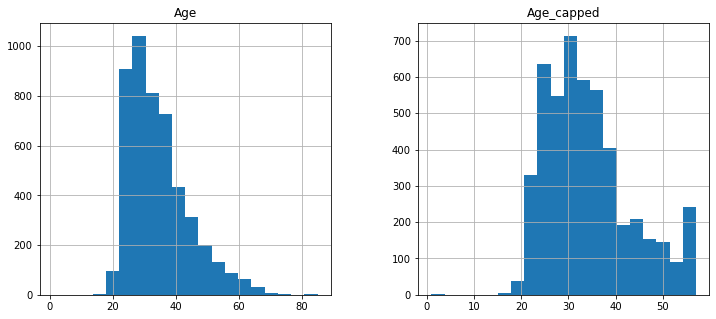

In [70]:
train[['Age', 'Age_capped']].hist(figsize=(12,5), bins=20)
plt.show()

# Exercises

Within your `codeup-data-science` directory, create a new directory named `clustering-exercises`. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Save your clustering work in your `clustering-exercises` repo. Then add, commit, and push your changes.

For example, if the
exercise directs you to create a file named `myfile.py`, you should have
`clustering/myfile.py` in your repository.

If a file extension is specified, you should create that specific file. If there
is not file extension specified, you may either create a python script or a
jupyter notebook for the exercise.

!!!tip "Workflow"
    Throughout the exercises, you may wish to do your work in a notebook, then
    transfer any functions you've created to an external python script.

    Keep in mind this is not always a linear process! You will probably be
    cycling between a notebook and an external python script frequently.

    Remember to run your code often to check for correct output and/or errors.

## Acquire (acquire.py)

### Zillow

For the following, iterate through the steps you would take to create functions:
Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions. 

You will have a zillow.ipynb file and a helper file for each section in the pipeline. 


#### acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database. 
    - **_Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`._**  
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.  
    - Only include properties that include a latitude and longitude value.  

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)
3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

|                          | num_rows_missing | pct_rows_missing  |
| ------------------------ |-----------------:| -----------------:|
| parcelid                 | 0                | 0.000000          |
| airconditioningtypeid    | 29041            | 0.535486          |
| architecturalstyletypeid | 54232            | 0.999982          |


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values. 


| num_cols_missing  | pct_cols_missing | num_rows  |
| ----------------- |-----------------:| ---------:|
| 23                | 38.333           | 108       |
| 24                | 40.000           | 123       |
| 25                | 41.667           | 5280      |

#### Prepare 

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.  

1. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).  
    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column.  i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing). 
    - The output:
        - The dataframe with the columns and rows dropped as indicated. *Be sure to drop the columns prior to the rows in your function.*
    - hint:
        - Look up the dropna documentation. 
        - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.

1. Decide how to handle the remaining missing values: 
    - Fill with constant value.
    - Impute with mean, median, mode.
    - Drop row/column
    

#### wrangle_zillow.py

Functions of the work above needed to acquire and prepare a new sample of data. 


### Mall Customers

#### notebook

1. Acquire data from mall_customers.customers in mysql database. 
2. Summarize data (include distributions and descriptive statistics).
2. Detect outliers using IQR.
3. Split data (train, validate, and test split).
3. Encode categorical columns using a one hot encoder (pd.get_dummies).
4. Handles missing values.
5. Scaling

#### wrangle_mall.py 

1. Acquire data from mall_customers.customers in mysql database. 
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
3. Missing values
4. Scaling